In [1]:
import numpy as np
import matplotlib.pyplot as plt
from helpers import *
from implementations import *
import seaborn as sns
import pandas as pd
import pickle

## Data Cleaning

#### Check missing column values

In [2]:
# Utility functions
def load_data():
    """load data."""
    f = open(f"dataset/x_train.csv")
    features = f.readline()
    feature_names = features.split(',')
    data = np.loadtxt(f"dataset/x_train.csv", delimiter=",", skiprows=1, dtype=str)
    return data,feature_names

def convert_row_to_float(row):
    """Convert values in row to float or np.nan."""
    new_row = []
    for item in row:
        try:
            new_row.append(float(item))
        except ValueError:
            new_row.append(np.nan)
    return np.array(new_row)

def convert_all_rows(data):
    """Convert all rows to float or np.nan."""
    new_data = []
    for row in data:
        new_data.append(convert_row_to_float(row))
    return np.array(new_data)

def column_NAN(array):
    nan=0
    for i in range(len(array)):
        if np.isnan(array[i]):
                nan += 1
    return nan

In [3]:
def train_validation_split(data, ratio, seed):
    """Split data into training and validation set."""
    np.random.seed(seed)
    np.random.shuffle(data)
    split_index = int(len(data) * ratio)
    return data[:split_index], data[split_index:]

def k_fold_split(data, k, seed):
    """Split data into k folds."""
    np.random.seed(seed)
    np.random.shuffle(data)
    return np.array_split(data, k)

def standardize_data(data):
    """Standardize data."""
    mean = np.nanmean(data, axis=0)
    std = np.nanstd(data, axis=0)
    return (data - mean) / std

In [4]:
numpy_data, features = load_data()
import pandas as pd
pandas_df = pd.read_csv("dataset/x_train.csv")

In [6]:
pandas_df = panda_df

In [ ]:
display(pandas_df)
print(numpy_data)

Drop:
- CTELNUM

In [ ]:
first_row = numpy_data[0]
new_first_row = convert_row_to_float(first_row)
# Compare the values of the firs row in the numpy array and the pandas dataframe
for i, j in zip(pandas_df.iloc[0,:].values, new_first_row):
    print(f"Pandas value: {i} | Numpy value: {j}")

In [ ]:
data = convert_all_rows(numpy_data)
data

In [ ]:
data[:,0]

In [8]:
# Count the number of NaNs in each column
number_of_nans = pandas_df.isnull().sum()
# Sort in ascending order
number_of_nans.sort_values(inplace=True, ascending=False)
for index, value in zip(number_of_nans.index, number_of_nans.values):
    print(f"Column {index} has {value} NaNs")
# This shows that for some columns we essentially have no meaningful data.

In [90]:
column_NAN(data[:,features.index('COLGHOUS')])

In [ ]:
print(f"Total number of observations: {len(pandas_df)}")
print(f" 10% of the number of observations: {round(len(pandas_df) * 0.1)}")

Here we can decide which columns to drop based on the number of nans in the <span style="color:red"> test set </span> . \
Since at the end of the day we want to make predictions on the test set.

In [9]:
# Keep only the columns with less than 10% NaNs
columns_to_keep = []
for index, value in zip(number_of_nans.index, number_of_nans.values):
    if value < round(len(pandas_df) * 0.1):
        columns_to_keep.append(index)
# Keep only the columns with less than 10% NaNs
data_with_few_nans = pandas_df.loc[:, columns_to_keep]

# Save the columns_to_keep list to a pickle file
# with open("columns_to_keep_at_90.pkl", "wb") as f:
#     pickle.dump(columns_to_keep, f)

In [12]:
len(data_with_few_nans.columns)

139

,_FRUTSUM,_AIDTST3,HIVTST6,PNEUVAC3,FLUSHOT6,VEGEDA1_,SEATBELT,BEANDAY_,ORNGDAY_,STRENGTH,FTJUDA1_,GRENDAY_,_BMI5CAT,_BMI5,FRUTDA1_,EXERANY2,VEGETAB1,FVORANG,FVGREEN
0,0.71,2.0,2.0,2.0,1.0,0.71,1.0,0.13,0.27,105.0,0.00,0.10,2.0,20.78,0.71,1.0,205.0,308.0,303.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,28.70,NaN,NaN,NaN,NaN,NaN
2,2.03,2.0,2.0,2.0,1.0,1.00,1.0,0.43,0.43,888.0,0.03,1.00,NaN,NaN,2.00,1.0,101.0,203.0,101.0
3,0.00,2.0,2.0,2.0,2.0,1.00,1.0,0.07,0.71,201.0,0.00,1.00,3.0,27.96,0.00,1.0,101.0,205.0,101.0
4,1.50,2.0,2.0,2.0,2.0,0.83,1.0,0.50,0.27,888.0,1.00,0.13,2.0,24.39,0.50,1.0,325.0,308.0,304.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328130,1.00,2.0,2.0,2.0,1.0,1.00,1.0,0.33,0.23,888.0,0.00,0.33,2.0,24.69,1.00,1.0,101.0,307.0,310.0
328131,1.00,1.0,1.0,2.0,1.0,0.20,1.0,1.00,0.14,103.0,0.00,1.00,2.0,24.39,1.00,1.0,306.0,201.0,101.0
328132,1.00,2.0,2.0,2.0,2.0,0.57,2.0,0.00,0.14,104.0,0.00,0.07,4.0,58.53,1.00,1.0,204.0,201.0,302.0
328133,0.07,2.0,2.0,2.0,1.0,0.13,1.0,0.03,0.03,103.0,0.00,0.17,4.0,35.87,0.07,1.0,304.0,301.0,305.0


# Remove highly correlated variables:

HIVST6-AIDTST3
_FRUTSUM-FRUTDA1_
_BMI5CAT-BMI5
_FRUTSUM -FTJUDA1_
HTN4-HTM4 (perfect correlation)
_LMTSCL1 _LMTACT1 and _LMTWRK1
FC60_ MAXVO2_
_FRTLT1 _VEGTEX _TOTINDA _FRUITEX _PAINDX1

All the: _PA, _RF, _PAIN, _VEGT, _FRUTEX, _TOTINDA

PSU- SEQNO
DISPCODE - PAIM
_LTASTH1 - _CASTH1
_LLCPWT - _WT2RAKE
EDUC

In [20]:
def plot_heatmap_for_features(data, feature_min, feature_max):
    plt.figure(figsize=(20,20))
    sns.heatmap(data.iloc[:, feature_min:feature_max].corr(), annot=True, cmap="coolwarm")
    plt.show()

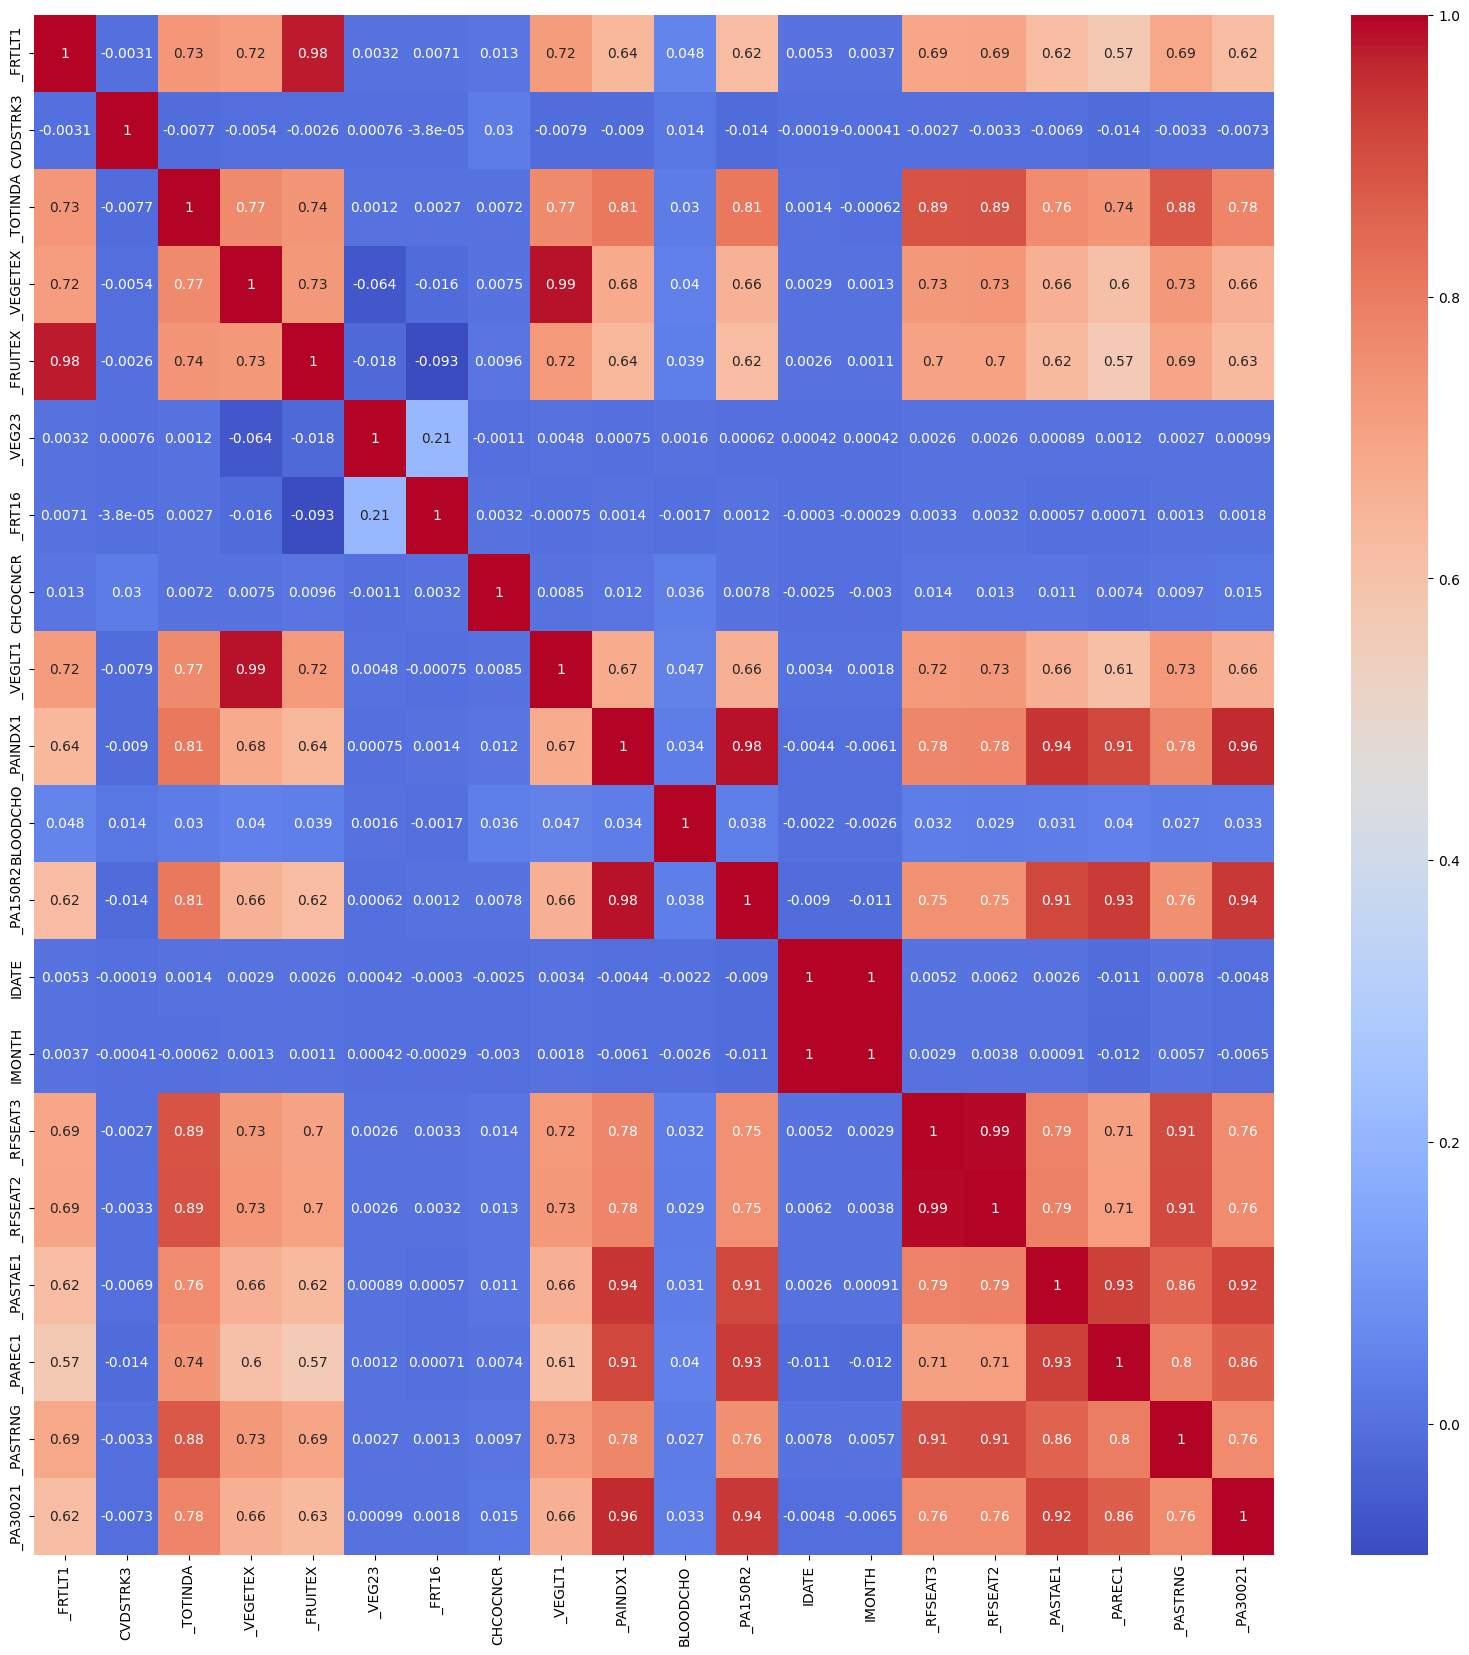

In [24]:
plot_heatmap_for_features(data_with_few_nans, 60, 80)

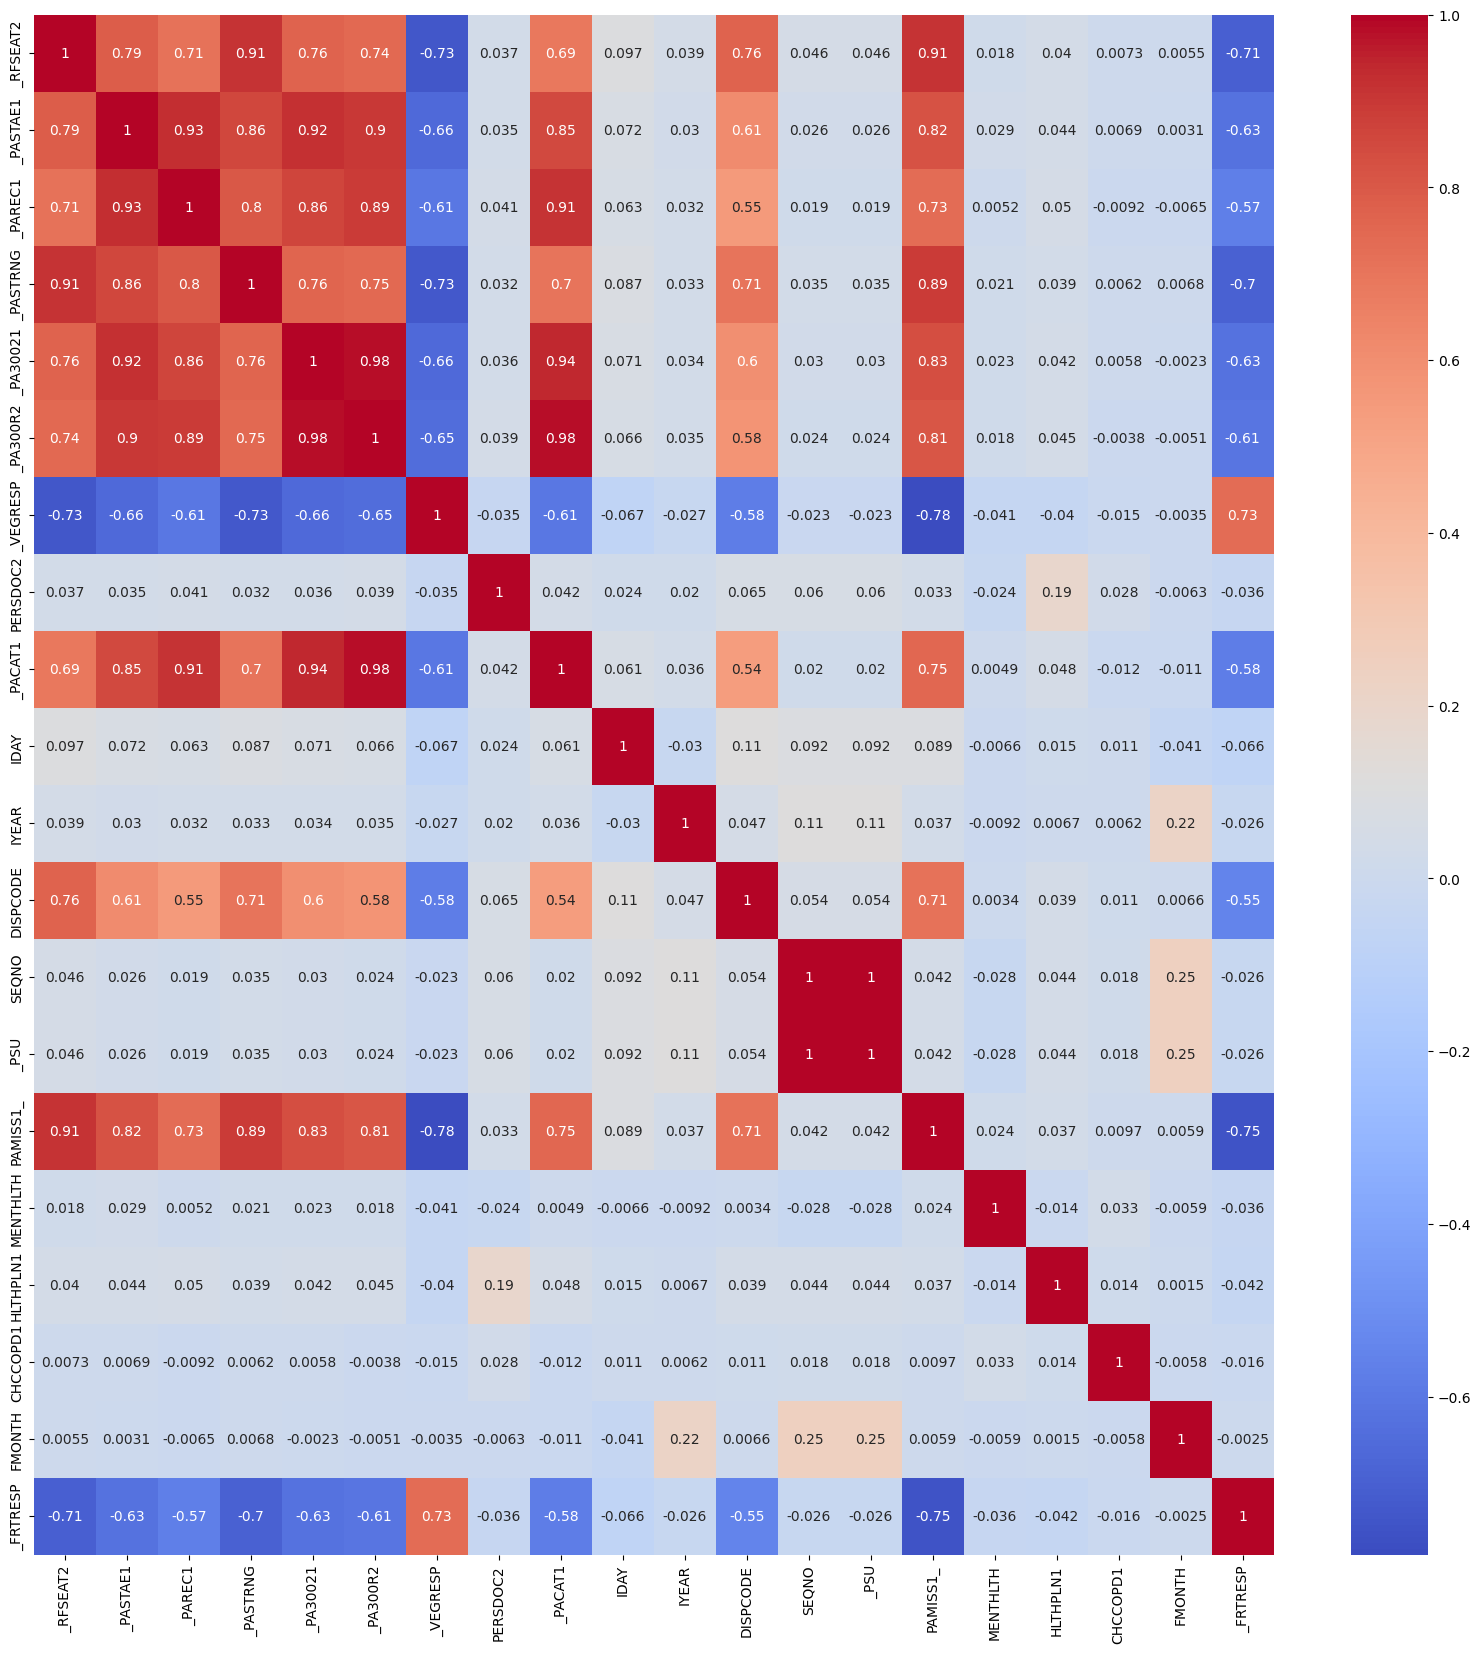

In [25]:
plot_heatmap_for_features(data_with_few_nans, 75, 95)

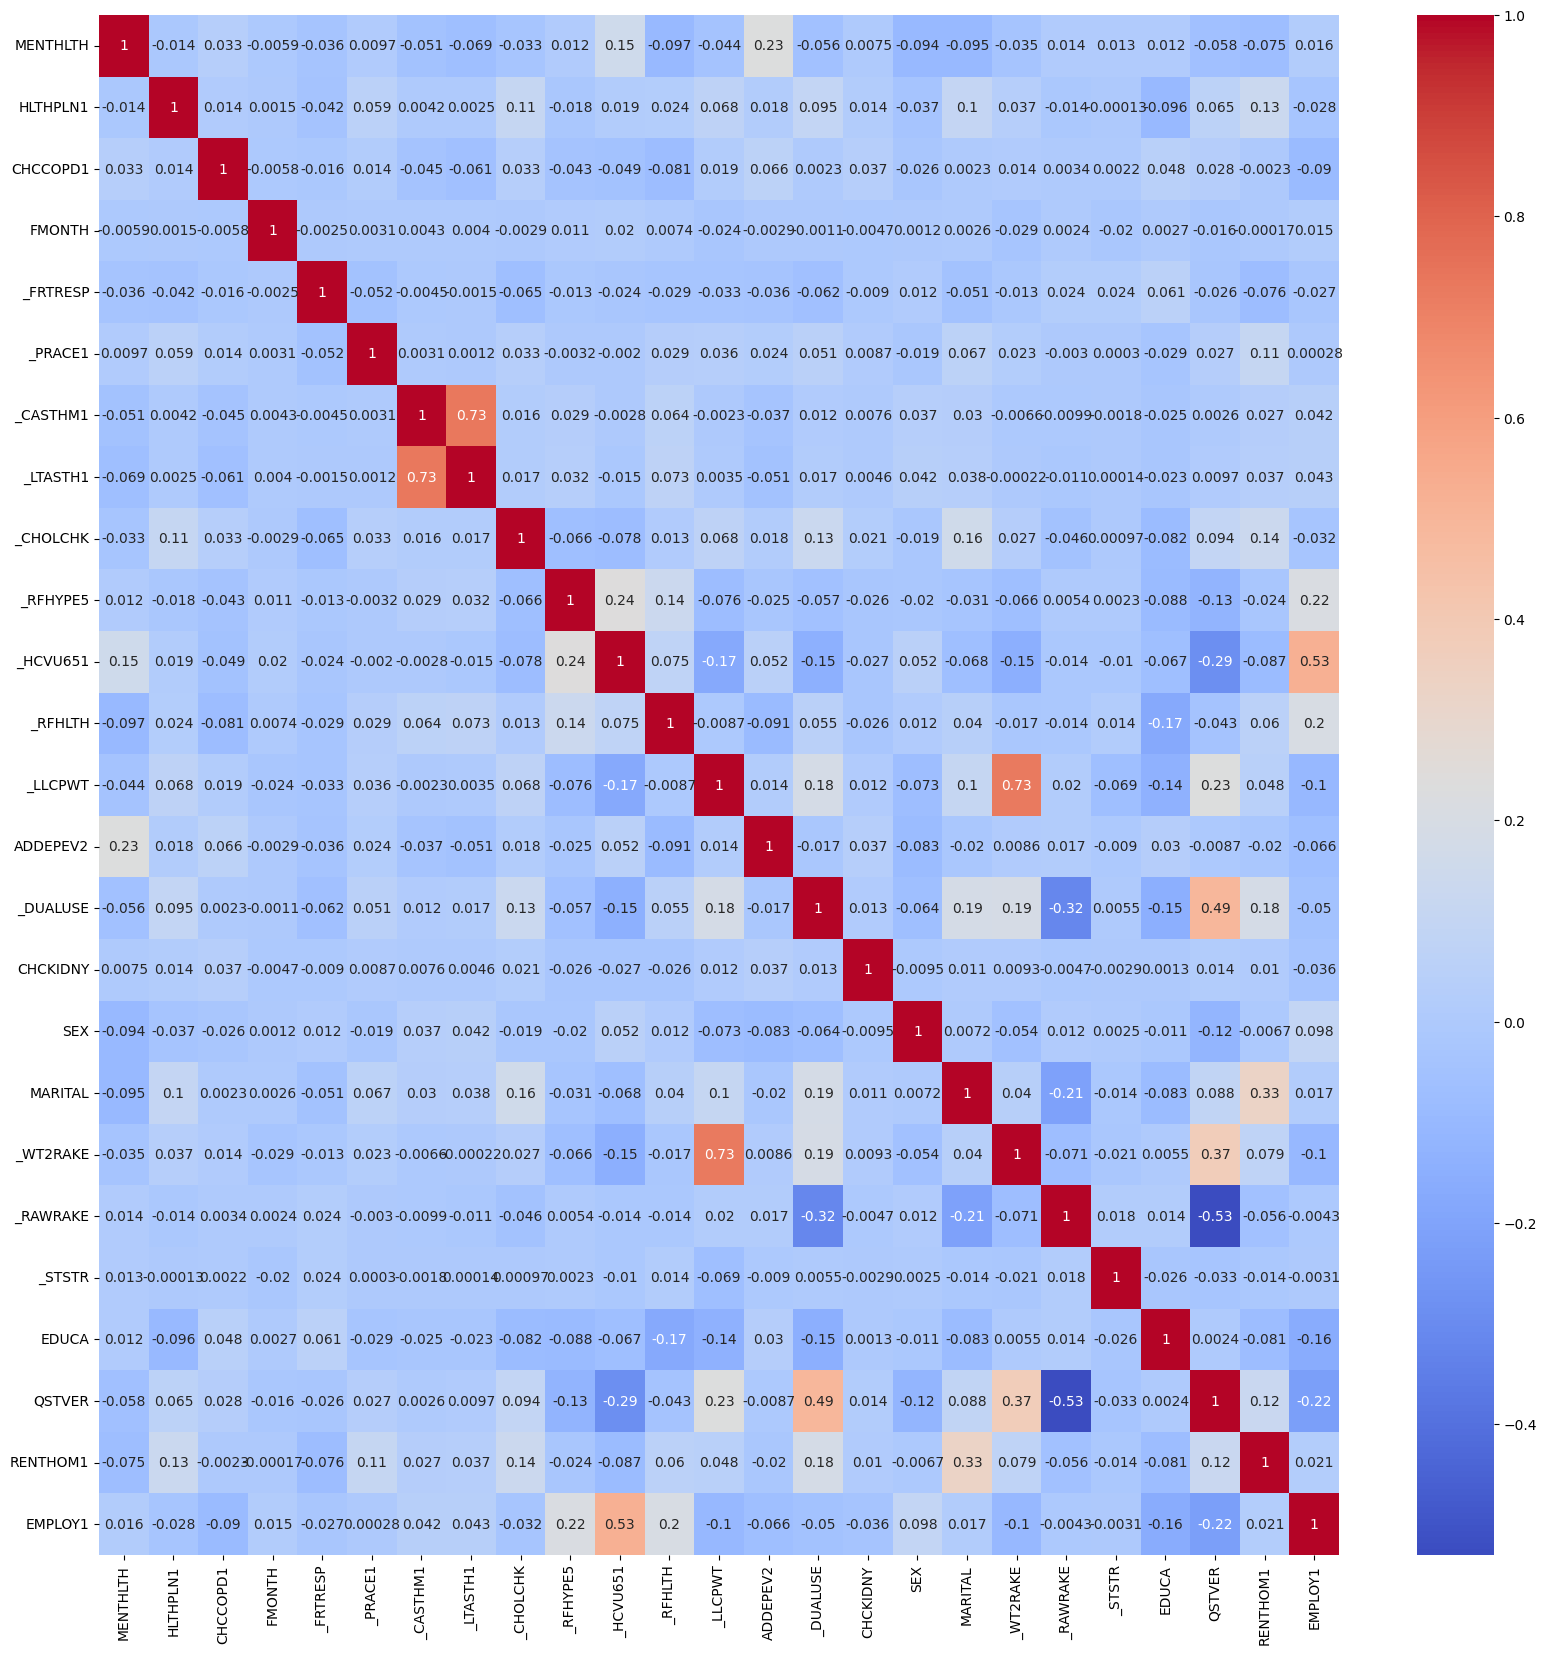

In [27]:
plot_heatmap_for_features(data_with_few_nans, 90, 115)

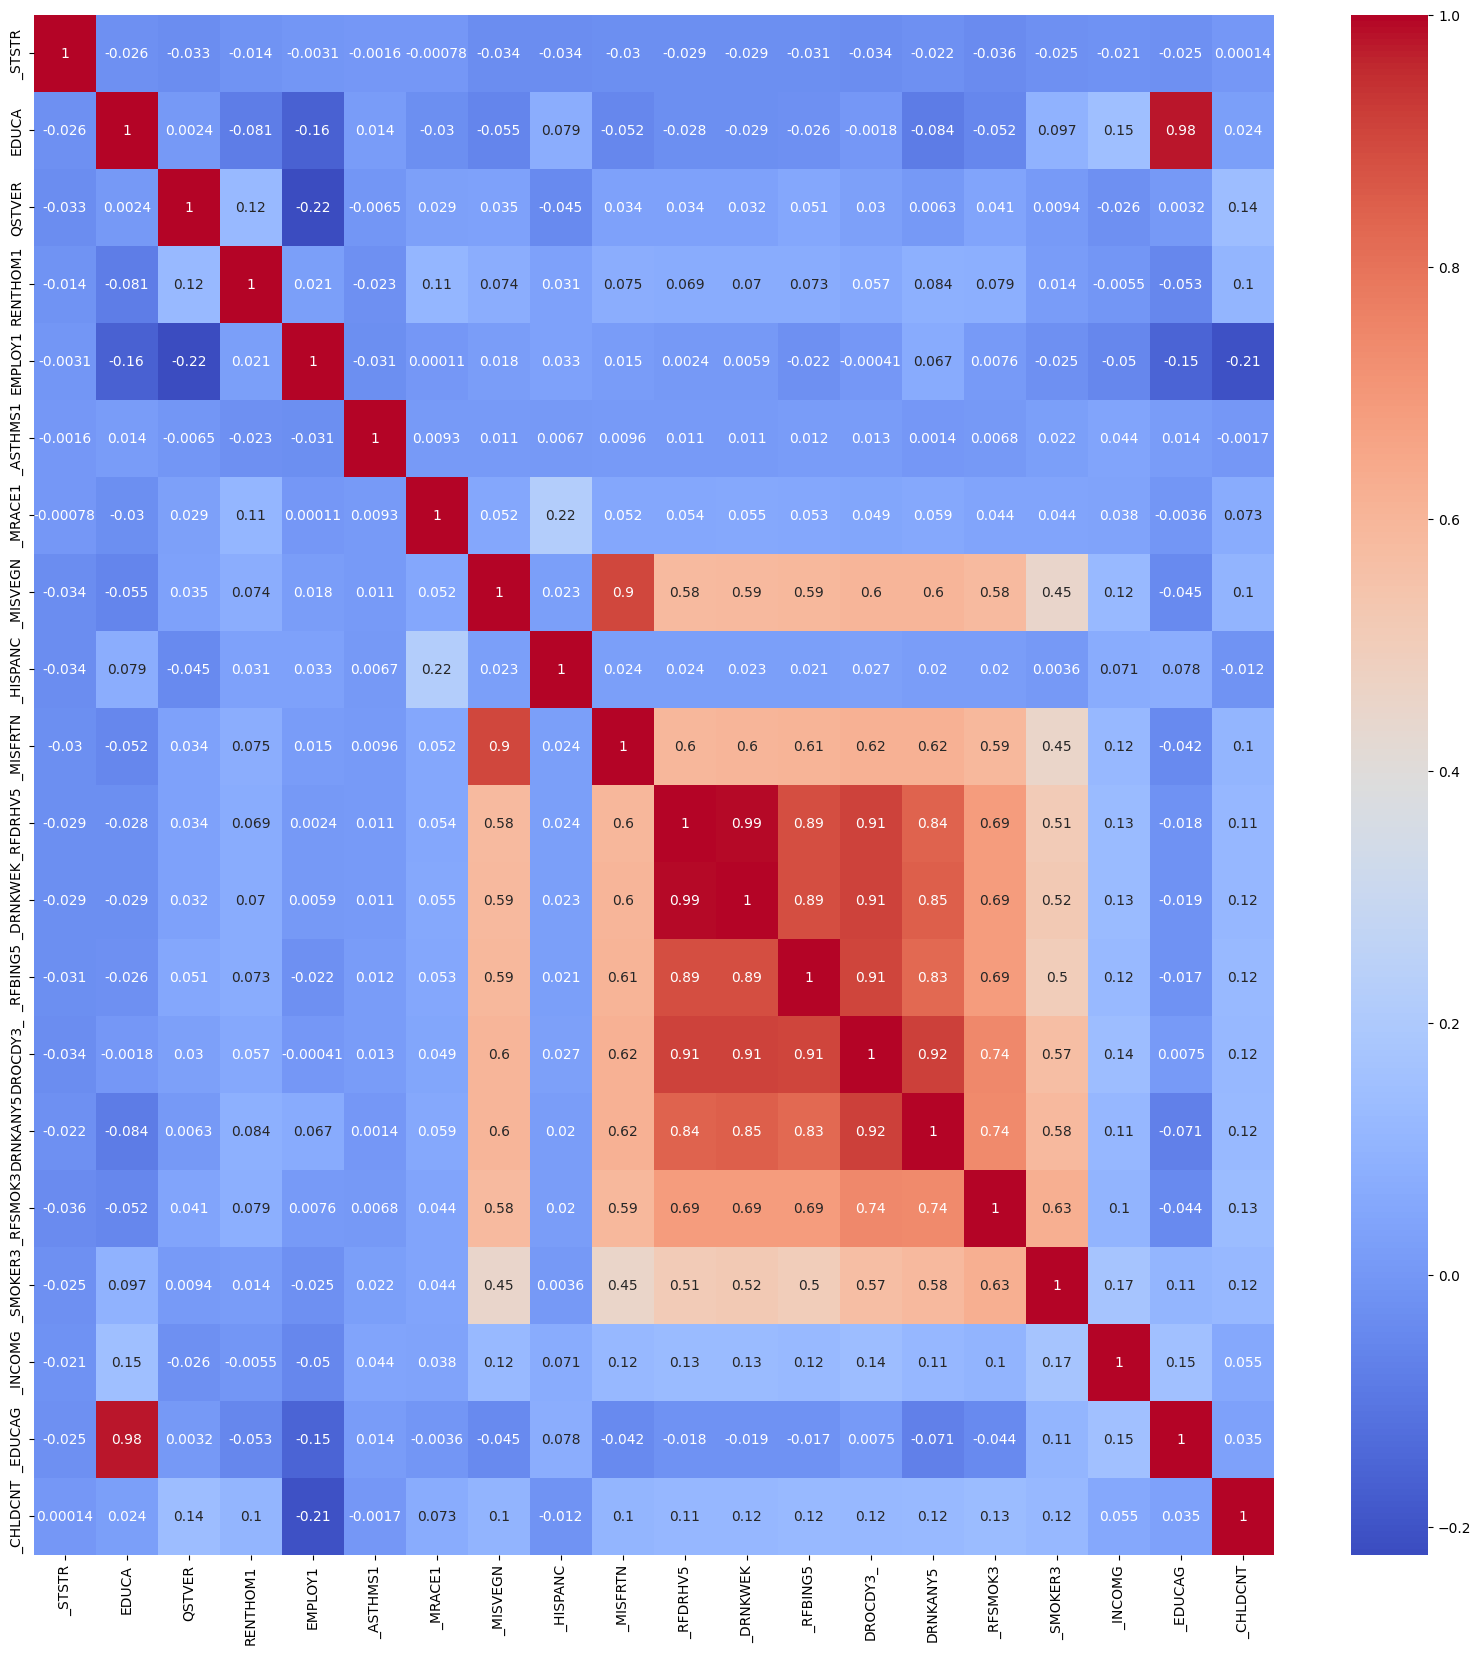

In [28]:
plot_heatmap_for_features(data_with_few_nans, 110, 130)

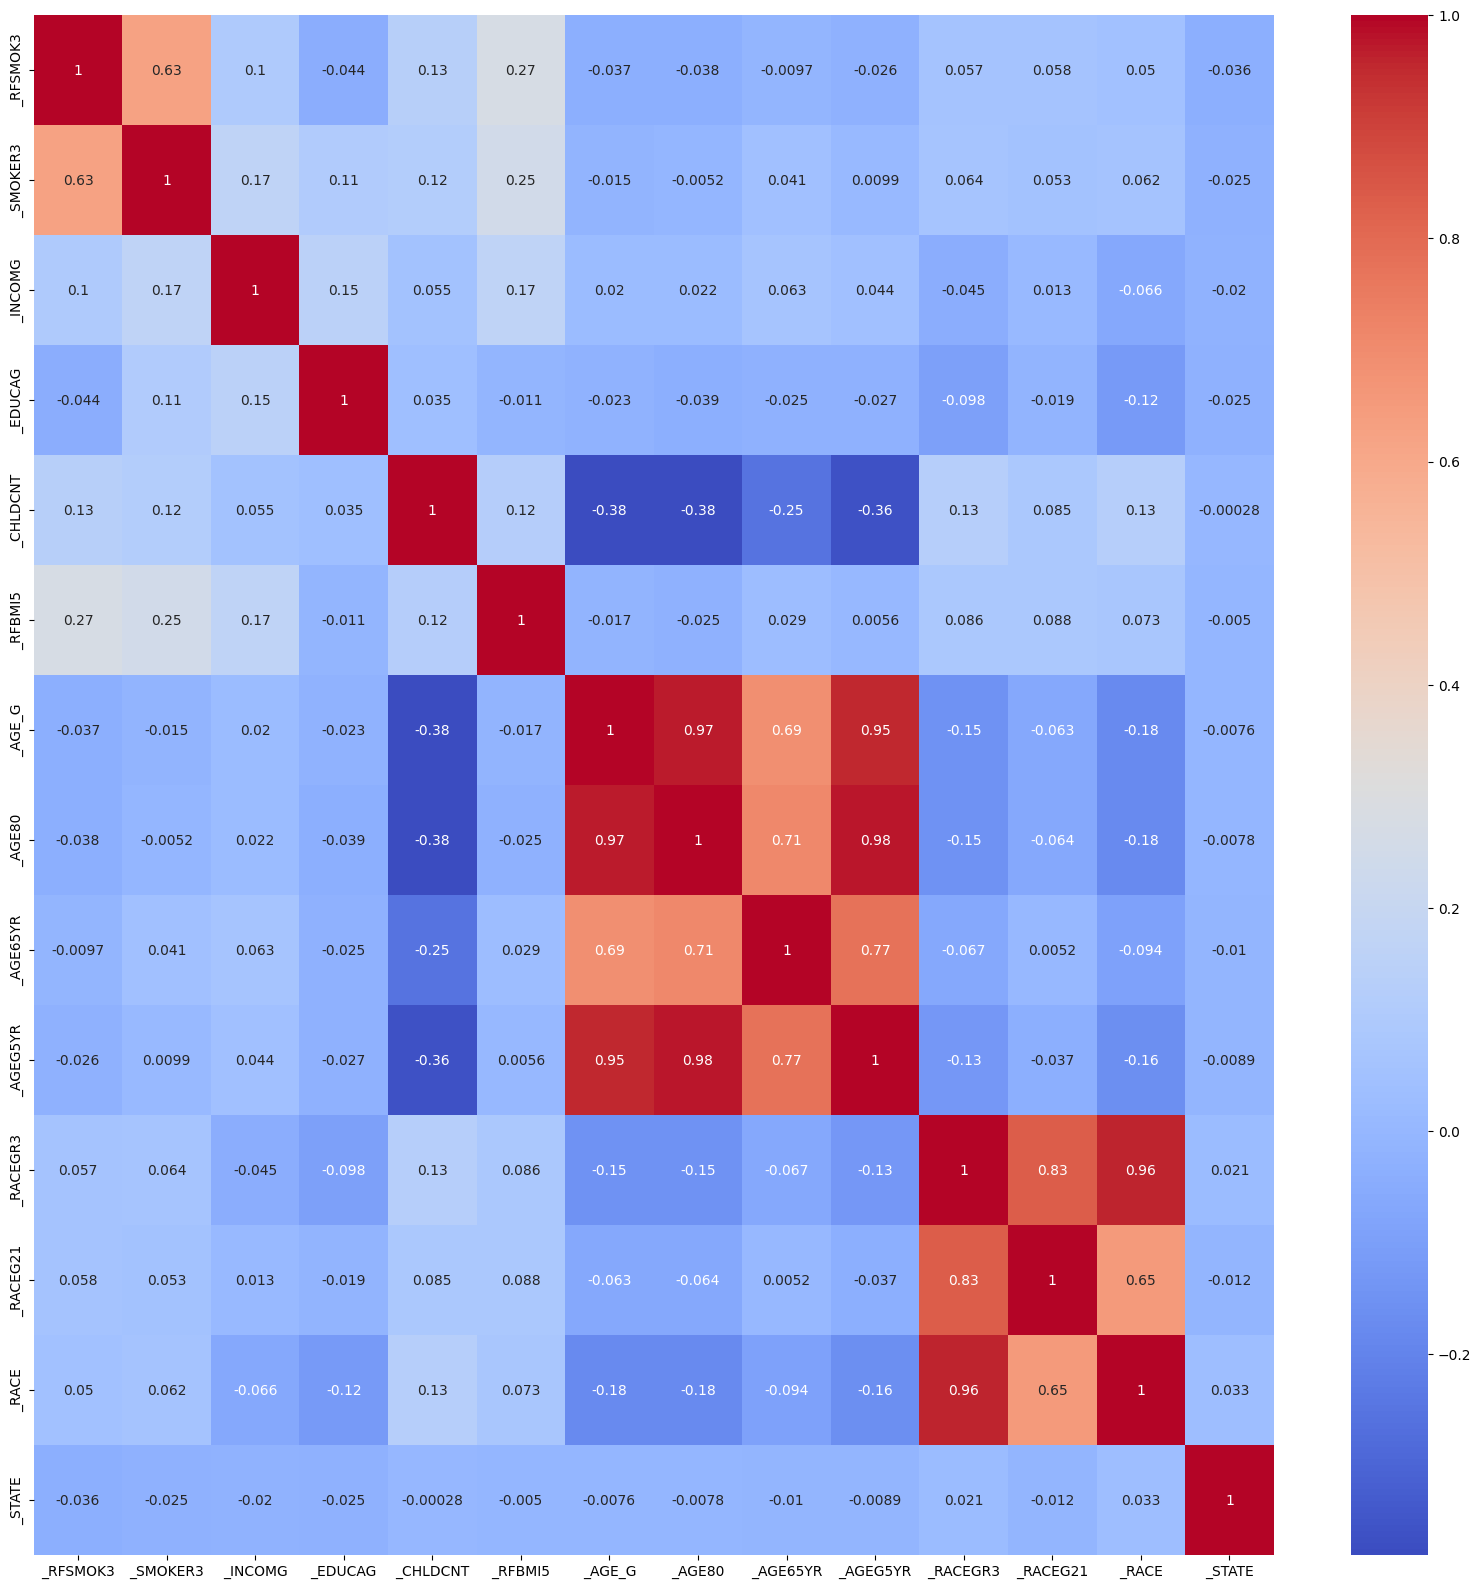

In [29]:
plot_heatmap_for_features(data_with_few_nans, 125, 139)

In [37]:
newfeature_correlation_dict = {}
# For each feature in the dataset calculate the correlation with the others and save those which have higher than 0.6 correlation

for feature in data_with_few_nans.columns:
    newfeature_correlation_dict[feature] = []
    for other_feature in data_with_few_nans.columns:
        if (feature != other_feature):
            correlation = data_with_few_nans[feature].corr(data_with_few_nans[other_feature])
            if correlation > 0.6:
                newfeature_correlation_dict[feature].append(other_feature)

In [44]:
len(list(newfeature_correlation_dict.keys()))

139

In [45]:
newfeature_correlation_dict

{'STRFREQ_': [],
 '_FRUTSUM': ['FTJUDA1_', 'FRUTDA1_'],
 '_AIDTST3': ['HIVTST6'],
 'HIVTST6': ['_AIDTST3'],
 'PNEUVAC3': [],
 'FLUSHOT6': [],
 'VEGEDA1_': [],
 'SEATBELT': ['_RFSEAT3', '_RFSEAT2'],
 'BEANDAY_': [],
 'ORNGDAY_': [],
 'STRENGTH': [],
 'FTJUDA1_': ['_FRUTSUM'],
 'GRENDAY_': [],
 '_BMI5CAT': ['_BMI5', 'WTKG3', '_RFBMI5'],
 '_BMI5': ['_BMI5CAT', 'WTKG3', '_RFBMI5'],
 'FRUTDA1_': ['_FRUTSUM'],
 'EXERANY2': ['_TOTINDA', 'PAMISS1_'],
 'VEGETAB1': [],
 'FVORANG': [],
 'FVGREEN': [],
 'WTKG3': ['_BMI5CAT', '_BMI5'],
 'FVBEANS': [],
 'FRUIT1': [],
 'FRUITJU1': [],
 'HTIN4': ['HTM4', 'HEIGHT3'],
 'ALCDAY5': ['DRNKANY5'],
 'HTM4': ['HTIN4'],
 'USENOW3': [],
 'SMOKE100': ['_SMOKER3'],
 'DIFFALON': [],
 'DIFFDRES': [],
 'DIFFWALK': [],
 'DECIDE': [],
 'BLIND': [],
 'USEEQUIP': [],
 'QLACTLM2': [],
 '_RACE_G1': ['_RACEGR3', '_RACEG21', '_RACE'],
 'HEIGHT3': ['HTIN4'],
 'WEIGHT2': ['_RFBMI5'],
 'INTERNET': [],
 'INCOME2': ['_INCOMG'],
 '_LMTSCL1': ['_LMTWRK1', '_LMTACT1'],
 '_LMTWRK1':

In [46]:
with open(f"feature_correlation_dict.pkl",'wb') as f:
    pickle.dump(newfeature_correlation_dict,f)

In [47]:
with open(f"feature_correlation_dict.pkl",'rb') as f:
    newfeature_correlation_dict = pickle.load(f)

Procedure:
1. We want to reduce our number of features to around 50.
2. Idea: Drop the features that have must number of correlation with others until we reach 50.
3. Rule: No Base class can be dropped


In [ ]:
print(pandas_df.shape)
print(data_with_few_nans.shape)

In [ ]:
# Cound the number of unique values in each column
number_of_unique_values = data_with_few_nans.nunique()
# Sort in ascending order
number_of_unique_values.sort_values(inplace=True, ascending=False)
for index, value in zip(number_of_unique_values.index, number_of_unique_values.values):
    print(f"Column {index} has {value} unique values")

<span style="color:red"> Here we also need to make a decision what threshold to use for columns to drop. </span> 

Could be that we use:
- Even higher threshold than 90%
- A smaller threshold and try to interpolate the data from other features.

Optimally: I think what we want is to <span style="color:red"> have train -test sets independent of what columns we dropped </span> that way we could compare the loss across models which use different numbers of features.

## a) Carry on Datanalysis only with columns having > 90% of values

In [ ]:
# Count the number of missing values for each row
number_of_nans_per_row = data_with_few_nans.isnull().sum(axis=1)
# Sort in ascending order
number_of_nans_per_row.sort_values(inplace=True, ascending=False)
for index, value in zip(number_of_nans_per_row.index, number_of_nans_per_row.values):
    print(f"Row {index} has {value} NaNs")

# Plot the histogram of the number of missing values per row
plt.figure(figsize=(10, 5))
plt.hist(number_of_nans_per_row.values, bins=20)
plt.xlabel("Number of NaNs")
plt.ylabel("Count")
plt.title("Number of NaNs per row")

We see that for most rows we actually have around 0 Missing values, which is pretty good for the Test set.

We have a number of choices here: 
- Drop rows which have say more than 10 missing value.
- Replace all the Nan values with zeros.
- Replace all the Nan values with medians, means, modes
- Use some sort of interpolation technique

In [ ]:
# Read in the y_train data
y_train = pd.read_csv("dataset/y_train.csv")

In [ ]:
# Now remove the columns with more than 10% of Nans using  the columns_to_keep list
x_train_reduced_90 = data_with_few_nans

# Again count the number of NaNs in each column
number_of_nans = x_train_reduced_90.isnull().sum()
number_of_nans.sort_values(inplace=True, ascending=False)
for index, value in zip(number_of_nans.index, number_of_nans.values):
    print(f"Column {index} has {value} NaNs")

Looks quite similar to the Test data fortunately

In [ ]:
def drop_rows_by_missing_values(data, threshold):
    """Drop rows with more than threshold missing values."""
    number_of_nans_per_row = data.isnull().sum(axis=1)
    rows_to_drop = number_of_nans_per_row[number_of_nans_per_row > threshold].index
    new_data = data.drop(rows_to_drop)
    return new_data

In [ ]:
def replace_missing_values_with_mean(data):
    """Replace missing values with the mean of the column."""
    new_data = data.fillna(data.mean())
    return new_data

def replace_missing_values_with_median(data):
    """Replace missing values with the median of the column."""
    new_data = data.fillna(data.median())
    return new_data

def replace_missing_values_with_mode(data):
    """Replace missing values with the mode of the column."""
    new_data = data.fillna(data.mode().iloc[0])
    return new_data

def replace_missing_values_with_zero(data):
    """Replace missing values with zero."""
    new_data = data.fillna(0)
    return new_data

#### Scenario 1)
#### Do not Drop data, replace the missing values in each row with column means

In [ ]:
# Standardize the data
df_train_reduced_90_mean = standardize_data(x_train_reduced_90)
#Fill in the missing values with the mean of the column
df_train_reduced_90_mean = replace_missing_values_with_mean(df_train_reduced_90_mean)
# Split the data into training and validation set
train_data, validation_data = train_validation_split(df_train_reduced_90_mean.values, 0.8, 42)
print(train_data.shape)
print(validation_data.shape)

Possibly also add a bias term to the features

In [ ]:
# Initialize the weights using the normal distribution
np.random.seed(42)
initial_weights = np.random.normal(size=train_data.shape[1])
# Fit the model using Linear Regression with Gradient Descent
w_ols_sgd, loss = mean_squared_error_gd(y_train.values, train_data, initial_w=initial_weights, max_iters=1000, gamma=0.1)

## Linear Regression using Gradient Descent

In [32]:
def mean_squared_error_gd(y, tx, initial_w, max_iters, gamma):
    """Calculate the mean squared error for gradient descent."""
    losses, weights  = gradient_descent(y, tx, initial_w, max_iters, gamma)
    w = weights[-1]
    loss = losses[-1]
    return w, loss

## Linear Regression using Stochastic Gradient Descent

In [33]:
def mean_squared_error_sgd(y, tx, initial_w, batch_size, max_iters, gamma):
    """Calculate the mean squared error for stochastic gradient descent."""
    weights, losses = stochastic_gradient_descent(y, tx, initial_w, batch_size, max_iters, gamma)
    w = weights[-1]
    loss = losses[-1]
    return w, loss

## Least squares regression

In [34]:
def least_squares(y, tx):
    """Calculate the least squares solution."""
    A = tx.T.dot(tx)
    b = tx.T.dot(y)
    w = np.linalg.solve(A, b)
    loss = compute_loss(y,tx,w)
    return w, loss

## Ridge Regression

In [35]:
def ridge_regression(y, tx, lambda_):
    """implement ridge regression."""
    aI = 2 * tx.shape[0] * lambda_ * np.identity(tx.shape[1])
    a = tx.T.dot(tx) + aI
    b = tx.T.dot(y)
    w = np.linalg.solve(a, b)
    loss = compute_loss(y,tx,w)
    return w, loss

## Logistic Regression

In [39]:
def logistic_regression_GD(y, tx, initial_w, max_iters, gamma):
    "Solve by maximizing the log likelihood"
    weights, losses = GD_logistic(y, tx, initial_w, max_iters, gamma)
    w = weights[-1]
    loss = losses[-1]
    return w, loss

In [ ]:
def logistic_regression_SGD(y, tx, initial_w, batch_size, max_iters, gamma):
    "Solve by maximizing the log likelihood"
    weights, losses = SGD_logistic(y, tx, initial_w, batch_size, max_iters, gamma)
    w = weights[-1]
    loss = losses[-1]
    return w, loss

## Regularized Logistic Regression

In [41]:
def Regularized_logistic_regression_GD(y, tx, initial_w, max_iters, gamma, lambda_):
    weights, losses = Regularized_GD_logistic(y, tx, initial_w, max_iters, gamma, lambda_)
    w = weights[-1]
    loss = losses[-1]
    return w, loss

In [ ]:
def Regularized_logistic_regression_SGD(y, tx, initial_w, batch_size, max_iters, gamma, lambda_):
    weights, losses = Regularized_SGD_logistic(y, tx, initial_w, batch_size, max_iters, gamma, lambda_)
    w = weights[-1]
    loss = losses[-1]
    return w, loss